In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit   
from xgboost import XGBRanker
from sklearn.model_selection import GroupShuffleSplit


In [2]:
df = pd.read_csv(r"C:\Users\kogla\OneDrive\SWE599-Flight-Ticket-Price-Estimation-Project\merged.csv").drop('Unnamed: 0', axis=1)
df.head()

,company,departure_airport,arrival_airport,departure_time,arrival_time,departure_date,price_try,departure_week_day,checked_week_day,departure_day,departure_month,remaining_day_to_flight,arrival_city,departure_airport_name,departure_hour,part_of_day,is_weekend,part_of_month,duration(min)
0,AnadoluJet,SAW,ADB,07:30:00,08:40:00,2022-11-14,506.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,7,Early Morning,Weekday,Middle,70
1,AnadoluJet,SAW,ADB,09:20:00,10:30:00,2022-11-14,506.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,9,Morning,Weekday,Middle,70
2,AnadoluJet,SAW,ADB,20:55:00,22:05:00,2022-11-14,506.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,20,Evening,Weekday,Middle,70
3,Pegasus,SAW,ADB,23:35:00,00:45:00,2022-11-14,539.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,23,Night,Weekday,Middle,70
4,Pegasus,SAW,ADB,09:10:00,10:20:00,2022-11-14,542.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,9,Morning,Weekday,Middle,70


In [3]:
df=df.drop(["departure_date",'departure_airport', 'arrival_airport','departure_time', 'arrival_time', 'duration(min)', 'checked_week_day'], axis=1)

In [4]:
df = df[['company', 'departure_airport_name', 'arrival_city',
         'departure_day', 'departure_month', 'departure_hour', 'part_of_day', 'departure_week_day', 'part_of_month','is_weekend',
        'price_try', 'remaining_day_to_flight' ]]

In [5]:
df['company'] = df.company.astype('category')
df['departure_airport_name'] = df.departure_airport_name.astype('category')
df['arrival_city'] = df.arrival_city.astype('category')
df['part_of_day'] = df.part_of_day.astype('category')
df['departure_week_day'] = df.departure_week_day.astype('category')
df['part_of_month'] = df.part_of_month.astype('category')
df['is_weekend'] = df.is_weekend.astype('category')
df["price_try"] = df["price_try"].astype("int64")
#df['departure_date']=pd.to_datetime(df['departure_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129513 entries, 0 to 129512
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   company                  129513 non-null  category
 1   departure_airport_name   129513 non-null  category
 2   arrival_city             129513 non-null  category
 3   departure_day            129513 non-null  int64   
 4   departure_month          129513 non-null  int64   
 5   departure_hour           129513 non-null  int64   
 6   part_of_day              129513 non-null  category
 7   departure_week_day       129513 non-null  category
 8   part_of_month            129513 non-null  category
 9   is_weekend               129513 non-null  category
 10  price_try                129513 non-null  int64   
 11  remaining_day_to_flight  129513 non-null  int64   
dtypes: category(7), int64(5)
memory usage: 5.8 MB


In [6]:
df_copy=df.copy()

In [7]:
le = preprocessing.LabelEncoder()
df_copy['arrival_city'] = le.fit_transform(df_copy['arrival_city'])

In [8]:
df_copy.head()

,company,departure_airport_name,arrival_city,departure_day,departure_month,departure_hour,part_of_day,departure_week_day,part_of_month,is_weekend,price_try,remaining_day_to_flight
0,AnadoluJet,Sabiha Gökçen Airport,9,14,11,7,Early Morning,Monday,Middle,Weekday,506,13
1,AnadoluJet,Sabiha Gökçen Airport,9,14,11,9,Morning,Monday,Middle,Weekday,506,13
2,AnadoluJet,Sabiha Gökçen Airport,9,14,11,20,Evening,Monday,Middle,Weekday,506,13
3,Pegasus,Sabiha Gökçen Airport,9,14,11,23,Night,Monday,Middle,Weekday,539,13
4,Pegasus,Sabiha Gökçen Airport,9,14,11,9,Morning,Monday,Middle,Weekday,542,13


In [9]:
categorical_cols = df_copy.select_dtypes(include=['category']).columns.to_list()

In [10]:
dummies_data = pd.get_dummies(df_copy[categorical_cols])
df_copy = pd.concat([df_copy.drop(categorical_cols, axis=1), dummies_data], axis=1)

In [11]:
df_copy.head()

,arrival_city,departure_day,departure_month,departure_hour,price_try,remaining_day_to_flight,company_AnadoluJet,company_Pegasus,company_Türk Hava Yolları,departure_airport_name_Istanbul Airport,...,departure_week_day_Saturday,departure_week_day_Sunday,departure_week_day_Thursday,departure_week_day_Tuesday,departure_week_day_Wednesday,part_of_month_Beginning,part_of_month_End,part_of_month_Middle,is_weekend_Weekday,is_weekend_Weekend
0,9,14,11,7,506,13,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,9,14,11,9,506,13,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,9,14,11,20,506,13,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,9,14,11,23,539,13,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,9,14,11,9,542,13,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [12]:
df_copy["price_try"]=np.log(df.price_try)

In [133]:
def group_df(df):
    grouped = df.groupby(['remaining_day_to_flight', 'arrival_city'], as_index=False)
    group_agg = grouped.agg({'price_try':'mean', 
                             'company_AnadoluJet': 'sum',
                             'company_Pegasus': 'sum',
                             'company_Türk Hava Yolları': 'sum',
                             'departure_airport_name_Istanbul Airport': 'sum',
                             'departure_airport_name_Sabiha Gökçen Airport': 'sum',
                             'part_of_day_Early Morning': 'sum',
                             'part_of_day_Evening': 'sum',
                             'part_of_day_Late Night': 'sum',
                             'part_of_day_Morning': 'sum',
                             'part_of_day_Night': 'sum',
                             'part_of_day_Noon': 'sum',
                             'departure_week_day_Friday': 'sum',
                             'departure_week_day_Monday': 'sum',
                             'departure_week_day_Saturday': 'sum',
                             'departure_week_day_Sunday': 'sum',
                             'departure_week_day_Thursday': 'sum',
                             'departure_week_day_Wednesday': 'sum',
                             'part_of_month_Beginning': 'sum',
                             'part_of_month_End': 'sum',
                             'part_of_month_Middle': 'sum',
                             'is_weekend_Weekend': 'sum',
                             'is_weekend_Weekday': 'sum',
                             
                            }).rename(columns={
                             'company_AnadoluJet': 'AnadoluJet',
                             'company_Pegasus': 'Pegasus',
                             'company_Türk Hava Yolları': 'TurkishAiriles',
                             'departure_airport_name_Istanbul Airport': 'IST',
                             'departure_airport_name_Sabiha Gökçen Airport': 'SAW',
                             'part_of_day_Early Morning': 'Early_Morning',
                             'part_of_day_Evening': 'Evening',
                             'part_of_day_Late Night': 'Late_Night',
                             'part_of_day_Morning': 'Morning',
                             'part_of_day_Night': 'Night',
                             'part_of_day_Noon': 'Noon',
                             'departure_week_day_Friday': 'Friday',
                             'departure_week_day_Monday': 'Monday',
                             'departure_week_day_Saturday': 'Saturday',
                             'departure_week_day_Sunday': 'Sunday',
                             'departure_week_day_Thursday': 'Thursday',
                             'departure_week_day_Wednesday': 'Wednesday',
                             'part_of_month_Beginning': 'Beginning',
                             'part_of_month_End': 'End',
                             'part_of_month_Middle': 'Middle',
                             'is_weekend_Weekend': 'Weekend',
                             'is_weekend_Weekday': 'Weekday',
    })
    

    return group_agg

In [134]:
df_grouped = group_df(df_copy)


In [135]:
gss = GroupShuffleSplit(test_size=.40, n_splits=1, random_state = 7).split(df_grouped, groups=df_grouped['remaining_day_to_flight'])

In [136]:
X_train_inds, X_test_inds = next(gss)
train_X= df_grouped.iloc[X_train_inds]
test_X= df_grouped.iloc[X_test_inds]


In [137]:
def get_model_input(df):
    group=df["remaining_day_to_flight"].value_counts().sort_index()
    feature_cols=list(df.drop(columns=["price_try"]).columns)
    df_x=df[feature_cols]
    df_y=df["price_try"]
    return df_x,df_y,group
    

In [138]:
X_train,y_train, group_train=get_model_input(train_X)
X_test,y_test, group_test=get_model_input(test_X)

In [139]:
model = XGBRanker(objective='rank:ndcg', n_estimators=100, random_state=0,learning_rate=0.1)
model.fit(
    X_train,
    y_train,
    group=group_train,
    eval_metric='ndcg',
    eval_set=[(X_test, y_test)],
    eval_group=[list(group_test)],
    verbose =True
)

[0]	validation_0-ndcg:0.98644
[1]	validation_0-ndcg:0.98644
[2]	validation_0-ndcg:0.98644
[3]	validation_0-ndcg:0.98746
[4]	validation_0-ndcg:0.98746
[5]	validation_0-ndcg:0.98746
[6]	validation_0-ndcg:0.98746
[7]	validation_0-ndcg:0.98746
[8]	validation_0-ndcg:0.98746
[9]	validation_0-ndcg:0.98746
[10]	validation_0-ndcg:0.98746
[11]	validation_0-ndcg:0.98746
[12]	validation_0-ndcg:0.98746
[13]	validation_0-ndcg:0.98746
[14]	validation_0-ndcg:0.98746
[15]	validation_0-ndcg:0.98746
[16]	validation_0-ndcg:0.98746
[17]	validation_0-ndcg:0.98746
[18]	validation_0-ndcg:0.98887
[19]	validation_0-ndcg:0.98887
[20]	validation_0-ndcg:0.98951
[21]	validation_0-ndcg:0.98951
[22]	validation_0-ndcg:0.98951
[23]	validation_0-ndcg:0.98951
[24]	validation_0-ndcg:0.98959
[25]	validation_0-ndcg:0.98959
[26]	validation_0-ndcg:0.98908
[27]	validation_0-ndcg:0.98908
[28]	validation_0-ndcg:0.98890
[29]	validation_0-ndcg:0.98890
[30]	validation_0-ndcg:0.98934
[31]	validation_0-ndcg:0.98934
[32]	validation_0-

C:\Users\kogla\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBRanker(base_score=0.5, booster='gbtree', callbacks=None, colsample_bylevel=1,
          colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=None,
          enable_categorical=False, eval_metric=None, feature_types=None,
          gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
          interaction_constraints='', learning_rate=0.1, max_bin=256,
          max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
          max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
          monotone_constraints='()', n_estimators=100, n_jobs=0,
          num_parallel_tree=1, objective='rank:ndcg', predictor='auto', ...)

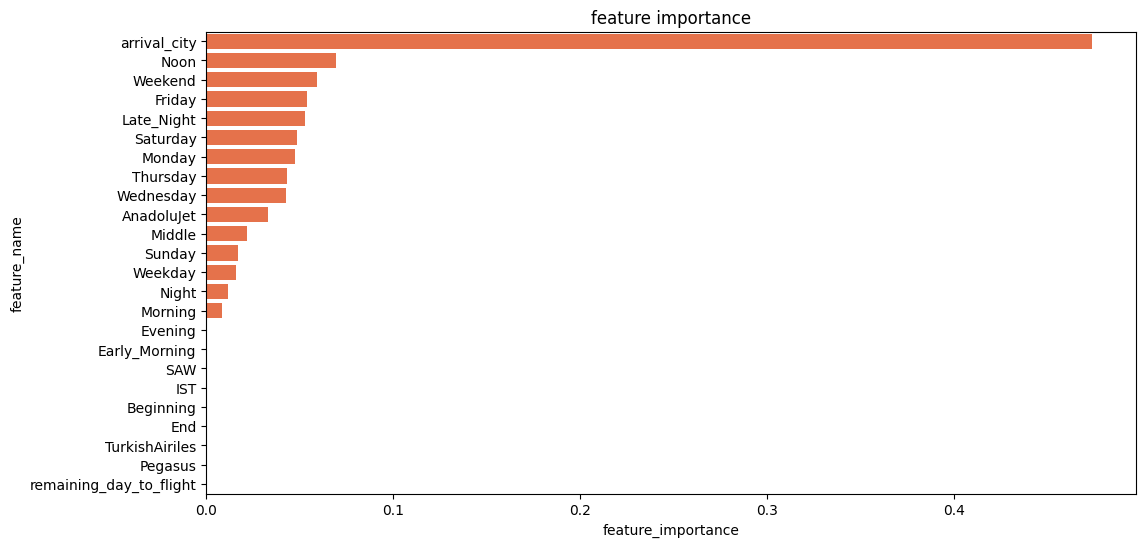

In [20]:
plt.figure(figsize=(12, 6))
df_plt = pd.DataFrame({'feature_name': X_train.columns, 'feature_importance': model.feature_importances_})
df_plt.sort_values('feature_importance', ascending=False, inplace=True)
sns.barplot(x="feature_importance", y="feature_name", data=df_plt,color='#FF6631')
plt.title('feature importance')
plt.show()

In [34]:
df_copy.head()

,arrival_city,departure_day,departure_month,departure_hour,price_try,remaining_day_to_flight,company_AnadoluJet,company_Pegasus,company_Türk Hava Yolları,departure_airport_name_Istanbul Airport,...,departure_week_day_Saturday,departure_week_day_Sunday,departure_week_day_Thursday,departure_week_day_Tuesday,departure_week_day_Wednesday,part_of_month_Beginning,part_of_month_End,part_of_month_Middle,is_weekend_Weekday,is_weekend_Weekend
0,9,14,11,7,6.226537,13,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,9,14,11,9,6.226537,13,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,9,14,11,20,6.226537,13,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,9,14,11,23,6.289716,13,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,9,14,11,9,6.295266,13,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [74]:
df_1=df_copy.copy()

In [75]:
gss = GroupShuffleSplit(test_size=.40, n_splits=1, random_state = 7).split(df_1, groups=df_1['remaining_day_to_flight'])

In [76]:
X_train_inds, X_test_inds = next(gss)
train_X= df_1.iloc[X_train_inds]
test_X= df_1.iloc[X_test_inds]


In [127]:
def group_df(df):
    grouped = df.groupby(['remaining_day_to_flight', 'arrival_city'])
    df_x = grouped.agg({ 
                             'company_AnadoluJet': 'sum',
                             'company_Pegasus': 'sum',
                             'company_Türk Hava Yolları': 'sum',
                             'departure_airport_name_Istanbul Airport': 'sum',
                             'departure_airport_name_Sabiha Gökçen Airport': 'sum',
                             'part_of_day_Early Morning': 'sum',
                             'part_of_day_Evening': 'sum',
                             'part_of_day_Late Night': 'sum',
                             'part_of_day_Morning': 'sum',
                             'part_of_day_Night': 'sum',
                             'part_of_day_Noon': 'sum',
                             'departure_week_day_Friday': 'sum',
                             'departure_week_day_Monday': 'sum',
                             'departure_week_day_Saturday': 'sum',
                             'departure_week_day_Sunday': 'sum',
                             'departure_week_day_Thursday': 'sum',
                             'departure_week_day_Wednesday': 'sum',
                             'part_of_month_Beginning': 'sum',
                             'part_of_month_End': 'sum',
                             'part_of_month_Middle': 'sum',
                             'is_weekend_Weekend': 'sum',
                             'is_weekend_Weekday': 'sum',
                             
                            }).rename(columns={
                             'company_AnadoluJet': 'AnadoluJet',
                             'company_Pegasus': 'Pegasus',
                             'company_Türk Hava Yolları': 'TurkishAiriles',
                             'departure_airport_name_Istanbul Airport': 'IST',
                             'departure_airport_name_Sabiha Gökçen Airport': 'SAW',
                             'part_of_day_Early Morning': 'Early_Morning',
                             'part_of_day_Evening': 'Evening',
                             'part_of_day_Late Night': 'Late_Night',
                             'part_of_day_Morning': 'Morning',
                             'part_of_day_Night': 'Night',
                             'part_of_day_Noon': 'Noon',
                             'departure_week_day_Friday': 'Friday',
                             'departure_week_day_Monday': 'Monday',
                             'departure_week_day_Saturday': 'Saturday',
                             'departure_week_day_Sunday': 'Sunday',
                             'departure_week_day_Thursday': 'Thursday',
                             'departure_week_day_Wednesday': 'Wednesday',
                             'part_of_month_Beginning': 'Beginning',
                             'part_of_month_End': 'End',
                             'part_of_month_Middle': 'Middle',
                             'is_weekend_Weekend': 'Weekend',
                             'is_weekend_Weekday': 'Weekday',
    })
    
    query_list = df['remaining_day_to_flight'].value_counts()
        
    df_y = grouped.agg({'price_try':'mean'}).squeeze()

    return df_x, df_y, query_list

In [128]:
X_train, y_train, query_list_train=group_df(train_X)
X_test, y_test, query_list_test=group_df(test_X)

In [129]:
X_train.shape[0]

468

In [130]:
query_list_train

29    4051
30    4043
27    3778
34    3725
26    3653
25    3370
37    3313
24    3187
39    3106
40    2942
41    2744
42    2582
20    2559
43    2381
47    2064
48    2053
15    1922
49    1881
51    1695
12    1666
52    1523
53    1350
10    1324
54    1203
9     1171
55    1033
8     1014
7      816
57     680
5      662
6      556
58     503
4      489
59     332
3      306
1      158
Name: remaining_day_to_flight, dtype: int64